# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Utils import *

In [2]:
# Setting Environment to ignore future warnings
import warnings
warnings.simplefilter(action="ignore")

In [3]:
# Setting pandas default parameters
pd.set_option("max_rows", 85)
pd.set_option("max_columns", 85)

# Loading Data

In [4]:
main_data,df,num_cols = load_data()

In [5]:
main_data.shape

(2919, 80)

In [6]:
num_cols.shape

(21,)

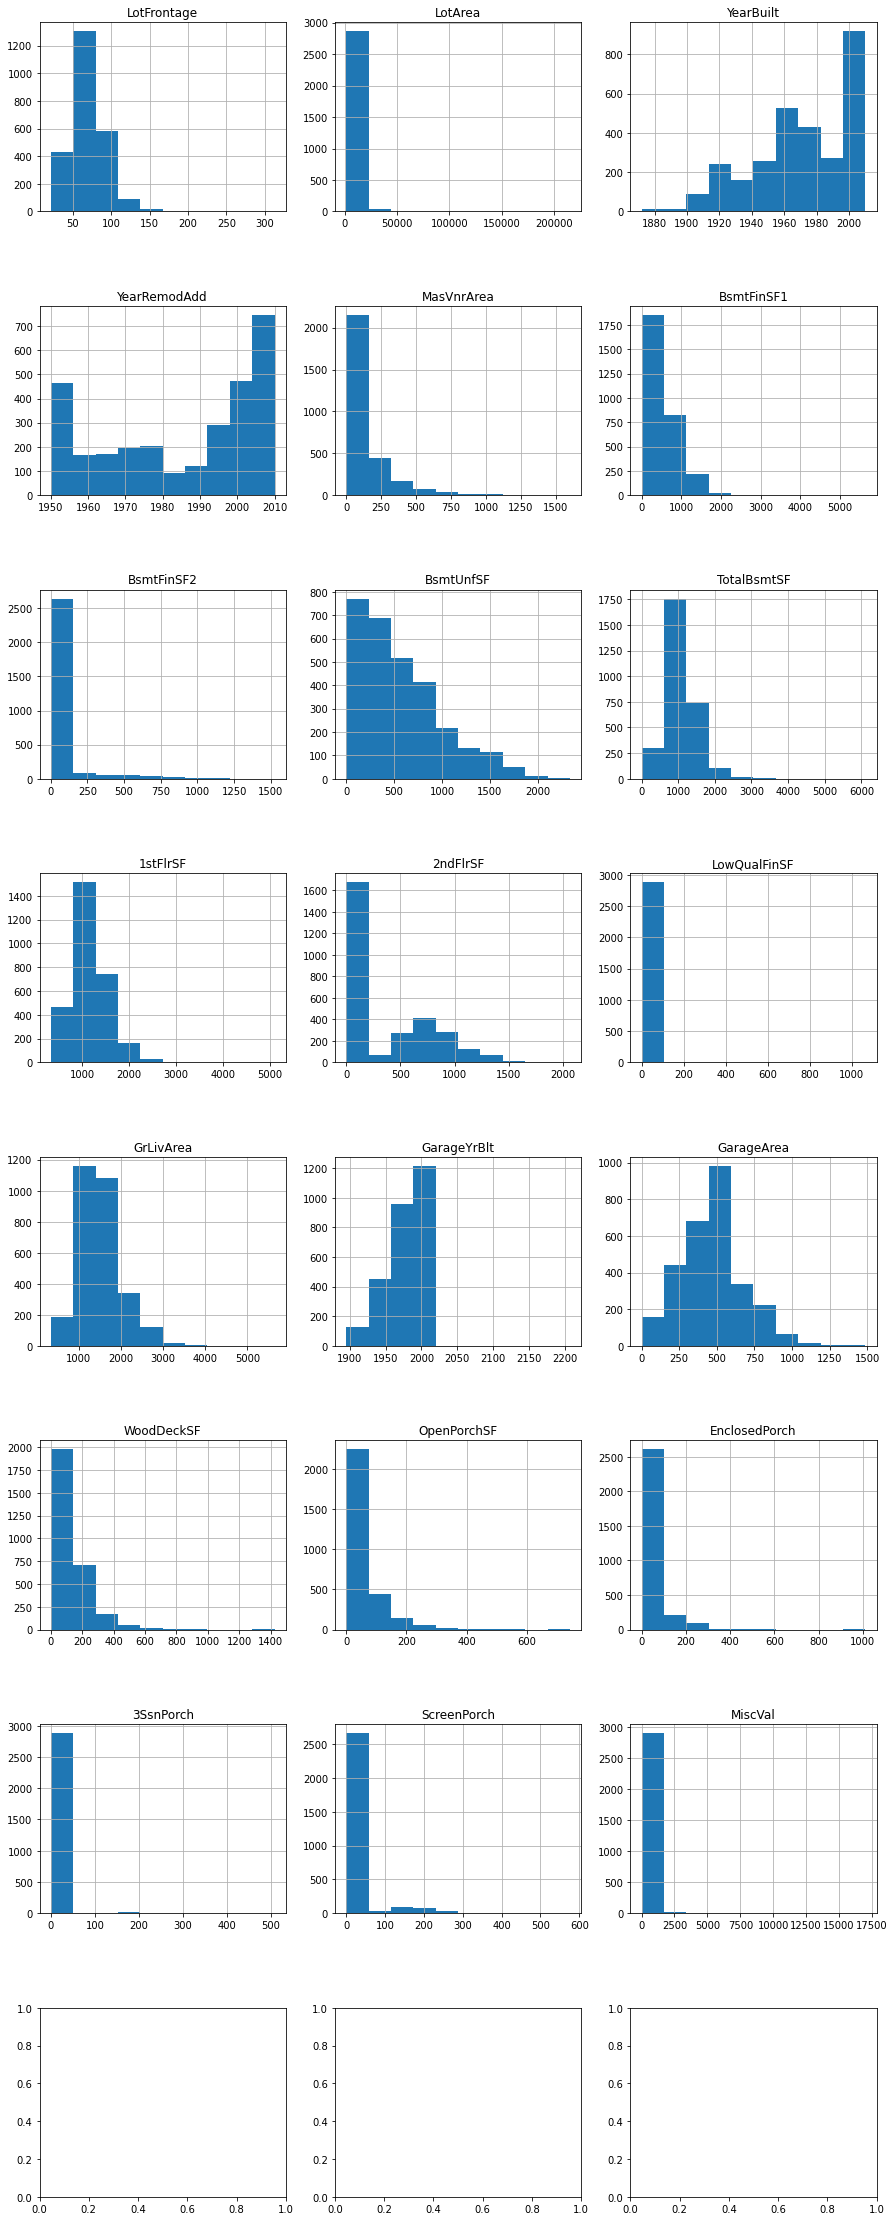

In [7]:
plot_num_cols(df, num_cols)


# Outlier Detection and Removal

Because we only have to check and remove outliers. So, we will deal only with Numerical features. Let's extract only numerical features from data.

In [ ]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,2003.0,548.0,0,61,0,0,0,0
2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,1976.0,460.0,298,0,0,0,0,0
3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,2001.0,608.0,0,42,0,0,0,0
4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1998.0,642.0,0,35,272,0,0,0
5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,2000.0,836.0,192,84,0,0,0,0


In [ ]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
LotFrontage,128,486,16.649538,float64
GarageYrBlt,103,159,5.447071,float64
MasVnrArea,444,23,0.787941,float64
BsmtFinSF1,991,1,0.034258,float64
BsmtFinSF2,272,1,0.034258,float64
BsmtUnfSF,1135,1,0.034258,float64
TotalBsmtSF,1058,1,0.034258,float64
GarageArea,603,1,0.034258,float64


In [ ]:
# Filling NAN with mean values
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)

In [ ]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,


In [ ]:
data = df.copy()

## Outlier removal wit STD Mean and model building

One of the ways we can remove outliers is remove any data points that are beyond 2 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [ ]:
# detecting outliers in feature
for i in data.columns:
    df = std_mean(i, df, 2)

# Displaying outliers
outliers_statistics(df)

,Outliers,Percentage of Outliers
Feature,,
GarageArea,234,8.016444
ScreenPorch,199,6.817403
LotFrontage,198,6.783145
EnclosedPorch,193,6.611853
BsmtUnfSF,163,5.584104
BsmtFinSF2,161,5.515588
TotalBsmtSF,156,5.344296
MasVnrArea,149,5.104488
OpenPorchSF,147,5.035971


In [ ]:
# Total Number of Outliers in all features
outliers_statistics(df).Outliers.sum()

2569

In [ ]:
# Preparing data for model
X_train, X_test, y_train, y_test, new_df = prepare_data(df,main_data,num_cols)

In [ ]:
plot_num_cols(new_df, num_cols)

In [ ]:
run_model("STD Mean", X_train, y_train)

Model Accuracy : 0.9783880766972067


## Outlier removal wit STD Median and model building

In [ ]:
df = data.copy()

In [ ]:
# detecting outliers in feature
for i in data.columns:
    df = std_median(i, df,2)

# Displaying outliers
outliers_statistics(df)

,Outliers,Percentage of Outliers
Feature,,
2ndFlrSF,440,15.073655
YearRemodAdd,375,12.846865
WoodDeckSF,302,10.346009
MasVnrArea,250,8.564577
EnclosedPorch,239,8.187736
GarageArea,228,7.810894
ScreenPorch,224,7.673861
BsmtUnfSF,210,7.194245
OpenPorchSF,200,6.851662


In [ ]:
# Total Number of Outliers in all features
outliers_statistics(df).Outliers.sum()

3840

In [ ]:
# Preparing data for model
X_train, X_test, y_train, y_test, new_df = prepare_data(df,main_data,num_cols)

In [ ]:
plot_num_cols(new_df, num_cols)

In [ ]:
run_model("STD Median", X_train, y_train)

Model Accuracy : 0.9783202865309311


With **Mean** method we detected **2605** outliers in whole dataset with standard deviation 2. And model's accuracy is 98 % percent on such data.

With **Median** method we detected **3495** outliers in whole dataset with standard deviation 2. Model accuracy is 1 percent less than the mean method. Here the accuracy is around 97 percent.

## Outlier removal with EllipticEnvelope and model building

In [ ]:
df = set_data(main_data,num_cols)

In [ ]:
from sklearn.covariance import EllipticEnvelope
ellip = EllipticEnvelope()
ellip.fit(df.drop("SalePrice", axis=1))

EllipticEnvelope()

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
y_pred = ellip.predict(df.drop("SalePrice", axis=1))
df["outlier"] = y_pred

# Dropping outliers
df = df[df.outlier == 1]

In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

In [ ]:
run_model("EllipticEnvelopen", X_train, y_train)

Model Accuracy : 0.9093903338554898


## Outlier removal with LocalOutlierFactor and model building

In [ ]:
df = set_data(main_data,num_cols)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
fac = LocalOutlierFactor()
fac.fit(df.drop("SalePrice", axis=1))

LocalOutlierFactor()

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
y_pred = fac.fit_predict(df.drop("SalePrice", axis=1))
df["outlier"] = y_pred

# Dropping outliers
df = df[df.outlier == 1]

In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

In [ ]:
run_model("LocalOutlierFactor", X_train, y_train)

Model Accuracy : 0.9106391178936067


## Outlier removal with IsolationForest and model building

In [ ]:
df = set_data(main_data,num_cols)

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
iso.fit(df.drop("SalePrice", axis=1))

IsolationForest()

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
y_pred = iso.fit_predict(df.drop("SalePrice", axis=1))
df["outlier"] = y_pred

# Dropping outliers
df = df[df.outlier == 1]

In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

In [ ]:
run_model("IsolationFactor", X_train, y_train)

Model Accuracy : 0.9136272142613456


# None

In [ ]:
df = set_data(main_data,num_cols)
X_train, X_test, y_train, y_test = split_data(df)

In [ ]:
run_model("None", X_train, y_train)

Model Accuracy : 0.914685131024232


# Comparison

In [ ]:
comp = pd.DataFrame({"Method": method_name, "Model's Performances": model_score})
comp.sort_values("Model's Performances", ascending=False, inplace=True)
comp

,Method,Model's Performances
0,STD Mean,0.978982
1,STD Mean,0.978388
2,STD Median,0.978320
6,None,0.914685
5,IsolationFactor,0.913627
4,LocalOutlierFactor,0.910639
3,EllipticEnvelopen,0.909390


From all of this we can see that our method **STD Mean** is performing best and than **STD Median**. Our proposed methods are performing much better than built-in methods.